#**PRAKRITI - DATA ANALYTICS**

#TEAM NAME : CHASING FAILURE
##MEMBERS : 
####Name - Chitranshu Ranjan
####Contact Number - 8207279999
####Email address - chitranshu47@gmail.com
####Institute - IIT Kharagpur

####Name - Kirti Vardhan
####Contact Number - 9117691398
####Email address - kirtivardhan2000@gmail.com
####Institute - IIT Kharagpur

####Name - Raunak Raj
####Contact Number - 9097856670
####Email address - raunakraj1219@gmail.com
####Institute - IIT Kharagpur

##Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

##Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing the Data and creating Dataframe

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Prakriti-2021/Data.csv')

In [4]:
df.head()

,Name,Ingradients,Diet,Preparation Time,Cooking Time,Flavor,Course,State,Region,Price/unit
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,260
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,270
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,450
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,460
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,300


In [5]:
df.describe()

,Preparation Time,Cooking Time,Price/unit
count,225.000000,227.000000,255.000000
mean,35.386667,38.911894,366.419608
std,76.241081,49.421711,99.660647
min,5.000000,2.000000,200.000000
25%,10.000000,20.000000,285.000000
50%,10.000000,30.000000,340.000000
75%,20.000000,45.000000,450.000000
max,500.000000,720.000000,890.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              255 non-null    object 
 1   Ingradients       255 non-null    object 
 2   Diet              255 non-null    object 
 3   Preparation Time  225 non-null    float64
 4   Cooking Time      227 non-null    float64
 5   Flavor            226 non-null    object 
 6   Course            255 non-null    object 
 7   State             231 non-null    object 
 8   Region            241 non-null    object 
 9   Price/unit        255 non-null    int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 20.0+ KB


In [7]:
#@unique values for given dataset
df.nunique()

Name                255
Ingradients         252
Diet                  2
Preparation Time     21
Cooking Time         18
Flavor                4
Course                4
State                24
Region                6
Price/unit           64
dtype: int64

In [8]:
# Showing Correlation among the Numeric Data
df.corr()

,Preparation Time,Cooking Time,Price/unit
Preparation Time,1.00000,0.110780,-0.038180
Cooking Time,0.11078,1.000000,-0.002958
Price/unit,-0.03818,-0.002958,1.000000


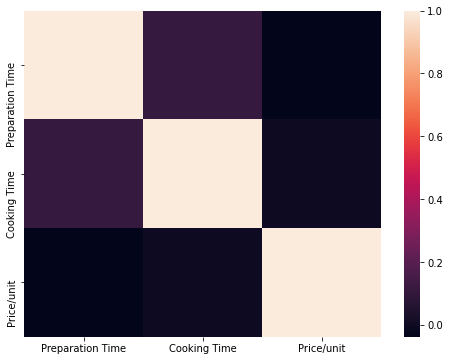

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

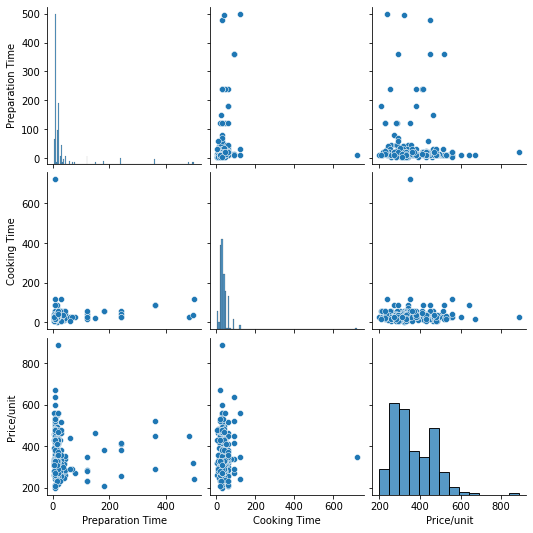

In [10]:
sns.pairplot(df)#let's take a look at the distributions.
plt.show()

## Identifying the missing data

In [11]:
df.isnull().sum()

Name                 0
Ingradients          0
Diet                 0
Preparation Time    30
Cooking Time        28
Flavor              29
Course               0
State               24
Region              14
Price/unit           0
dtype: int64

## Taking Care of Missing Data

### Handling the Categorical Features

In [12]:
from sklearn.impute import SimpleImputer
df = pd.DataFrame(df)
df = df.iloc[:,:].values
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(df[:,5:9])
df[:,5:9] = imp.transform(df[:,5:9])
df=pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,260
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,270
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,450
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,460
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,300


###Handling the numerical features

In [13]:
df = df.iloc[:,:].values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(df[:,3:5])
df[:,3:5] = imp.transform(df[:,3:5])
df=pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,260
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,270
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,450
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,460
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,300


## Importing Basic NLP libraries and using it on **Ingredient** column

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cleaning the text data

In [15]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    ps = PorterStemmer()
    text = ''.join([ps.stem(j) for j in text])

    return text
    
df[1] = df[1].apply(clean_text)

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Balu shahi,maida flour yogurt oil sugar,vegetarian,45,25,sweet,dessert,West Bengal,East,260
1,Boondi,gram flour ghee sugar,vegetarian,80,30,sweet,dessert,Rajasthan,West,270
2,Gajar ka halwa,carrots milk sugar ghee cashews raisins,vegetarian,15,60,sweet,dessert,Punjab,North,450
3,Ghevar,flour ghee kewra milk clarified butter sugar a...,vegetarian,15,30,sweet,dessert,Rajasthan,West,460
4,Gulab jamun,milk powder plain flour baking powder ghee mil...,vegetarian,15,40,sweet,dessert,West Bengal,East,300


## Importing libraries to handle text

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import text, sequence
from keras import utils

### Tokenizing the text data into matrix

In [18]:
tokenize = text.Tokenizer(char_level=False)
tokenize.fit_on_texts(df[1]) # only fit on train

temp = tokenize.texts_to_matrix(df[1])

In [19]:
temp = pd.DataFrame(temp)
temp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Balu shahi,maida flour yogurt oil sugar,vegetarian,45,25,sweet,dessert,West Bengal,East,260
1,Boondi,gram flour ghee sugar,vegetarian,80,30,sweet,dessert,Rajasthan,West,270
2,Gajar ka halwa,carrots milk sugar ghee cashews raisins,vegetarian,15,60,sweet,dessert,Punjab,North,450
3,Ghevar,flour ghee kewra milk clarified butter sugar a...,vegetarian,15,30,sweet,dessert,Rajasthan,West,460
4,Gulab jamun,milk powder plain flour baking powder ghee mil...,vegetarian,15,40,sweet,dessert,West Bengal,East,300


## Encoding the Categorical Data

In [22]:
d1 = pd.get_dummies(df[2])
d2 = pd.get_dummies(df[7])
d3 = pd.get_dummies(df[8])
d4 = pd.get_dummies(df[5])
d5 = pd.get_dummies(df[6])

In [23]:
d1.head()

,non vegetarian,vegetarian
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### Getting value counts for classes in Flavor

In [24]:
df[5].value_counts()

spicy     162
sweet      88
bitter      4
sour        1
Name: 5, dtype: int64

### Getting value counts for classes in Food Course Type

In [25]:
df[6].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: 6, dtype: int64

#CLASSIFICATION OF FOOD COURSE TYPE

### Concatenating the encoded categorical features and tokenized text matrix

In [26]:
y = df[6]
df1 = pd.concat([df,d1,d2,d3,d4,temp], axis=1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,non vegetarian,vegetarian,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,NCT of Delhi,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,...,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335
0,Balu shahi,maida flour yogurt oil sugar,vegetarian,45,25,sweet,dessert,West Bengal,East,260,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boondi,gram flour ghee sugar,vegetarian,80,30,sweet,dessert,Rajasthan,West,270,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Gajar ka halwa,carrots milk sugar ghee cashews raisins,vegetarian,15,60,sweet,dessert,Punjab,North,450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ghevar,flour ghee kewra milk clarified butter sugar a...,vegetarian,15,30,sweet,dessert,Rajasthan,West,460,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gulab jamun,milk powder plain flour baking powder ghee mil...,vegetarian,15,40,sweet,dessert,West Bengal,East,300,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Plotting the value count of different classes in Food Course Type

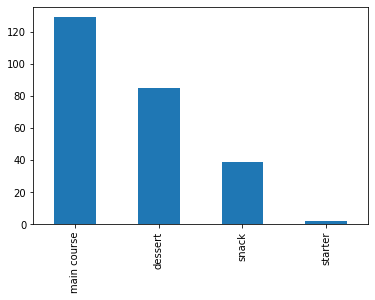

In [27]:
y.value_counts().plot.bar()

### Dropping initial text and categorical features

In [28]:
X = df1.drop(columns=[0,1,2,5,6,7,8])

## Standardization

In [29]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [30]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367
0,0.134534,-0.299009,-1.069920,-0.358216,0.358216,-0.202031,-0.299572,-0.109109,-0.062746,-0.109109,-0.548653,-0.062746,-0.088911,-0.15523,-0.179969,-0.088911,-0.365148,-0.088911,-0.062746,-0.062746,-0.168005,-0.378811,-0.155230,-0.29173,-0.141421,-0.062746,-0.191273,-0.062746,3.102418,-0.109109,2.688086,-0.487713,-0.32969,-0.548653,-0.725911,-0.126239,-0.062746,-1.319824,1.37758,1.929306,...,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746
1,0.624341,-0.191544,-0.969382,-0.358216,0.358216,-0.202031,-0.299572,-0.109109,-0.062746,-0.109109,-0.548653,-0.062746,-0.088911,-0.15523,-0.179969,-0.088911,-0.365148,-0.088911,-0.062746,-0.062746,-0.168005,-0.378811,6.442049,-0.29173,-0.141421,-0.062746,-0.191273,-0.062746,-0.322329,-0.109109,-0.372012,-0.487713,-0.32969,-0.548653,1.377580,-0.126239,-0.062746,-1.319824,1.37758,1.929306,...,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746
2,-0.285301,0.453248,0.840299,-0.358216,0.358216,-0.202031,-0.299572,-0.109109,-0.062746,-0.109109,-0.548653,-0.062746,-0.088911,-0.15523,-0.179969,-0.088911,-0.365148,-0.088911,-0.062746,-0.062746,-0.168005,2.639839,-0.155230,-0.29173,-0.141421,-0.062746,-0.191273,-0.062746,-0.322329,-0.109109,-0.372012,2.050386,-0.32969,-0.548653,-0.725911,-0.126239,-0.062746,-1.319824,1.37758,1.929306,...,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746
3,-0.285301,-0.191544,0.940837,-0.358216,0.358216,-0.202031,-0.299572,-0.109109,-0.062746,-0.109109,-0.548653,-0.062746,-0.088911,-0.15523,-0.179969,-0.088911,-0.365148,-0.088911,-0.062746,-0.062746,-0.168005,-0.378811,6.442049,-0.29173,-0.141421,-0.062746,-0.191273,-0.062746,-0.322329,-0.109109,-0.372012,-0.487713,-0.32969,-0.548653,1.377580,-0.126239,-0.062746,-1.319824,1.37758,1.929306,...,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746
4,-0.285301,0.023387,-0.667768,-0.358216,0.358216,-0.202031,-0.299572,-0.109109,-0.062746,-0.109109,-0.548653,-0.062746,-0.088911,-0.15523,-0.179969,-0.088911,-0.365148,-0.088911,-0.062746,-0.062746,-0.168005,-0.378811,-0.155230,-0.29173,-0.141421,-0.062746,-0.191273,-0.062746,3.102418,-0.109109,2.688086,-0.487713,-0.32969,-0.548653,-0.725911,-0.126239,-0.062746,-1.319824,1.37758,1.929306,...,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062

## Creating Train and Test Datasets with Test size as 20% of the given Dataset

In [31]:
X_test = X.iloc[50:101,:].values
X_train1 = X.iloc[:50,:].values
X_train2 = X.iloc[101:,:].values

X_test = pd.DataFrame(X_test)
X_train1 = pd.DataFrame(X_train1)
X_train2 = pd.DataFrame(X_train2)
X_train = pd.concat([X_train1,X_train2], axis=0)

y_test = y.iloc[50:101].values
y_train1 = y.iloc[:50].values
y_train2 = y.iloc[101:].values

y_test = pd.DataFrame(y_test)
y_train1 = pd.DataFrame(y_train1)
y_train2 = pd.DataFrame(y_train2)
y_train = pd.concat([y_train1,y_train2], axis=0)

In [32]:
print('Number of Train Data :',X_train.shape[0])
print('Number of Test Data :',X_test.shape[0])
print('Percentage of Train Data :',(X_train.shape[0]/ X.shape[0])*100 , '%')
print('Percentage of Test Data :',(X_test.shape[0]/ X.shape[0])*100 , '%')

Number of Train Data : 204
Number of Test Data : 51
Percentage of Train Data : 80.0 %
Percentage of Test Data : 20.0 %


#Classifiers
#1. Random Forest Classifier
#2. Support Vector Machine Classifier
#3. Gradient Boosting Classifier

##Random Forest Classifier

### Training the model and calculating Overall Accuracy and Kappa Coefficient

In [33]:
clf1 = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=2, criterion='entropy', max_features=None)
clf1.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)

print("Accuracy_Score :",accuracy_score(y_test, y_pred1))

print("Kappa_Score : ",cohen_kappa_score(y_test, y_pred1))

cm1 = confusion_matrix(y_test,y_pred1)
cm1 = pd.DataFrame(cm1)


Accuracy_Score : 0.8627450980392157
Kappa_Score :  0.7317806160781367


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Plotting the Confusion Matrix

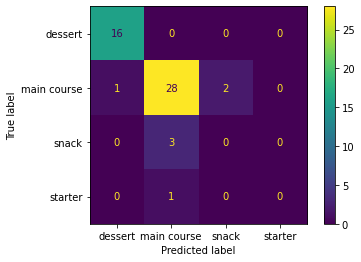

In [34]:
plot_confusion_matrix(clf1, X_test, y_test)  
plt.show() 

### Calculating the Producer's Accuracy

In [35]:
print('PRODUCERS ACCURACY')
print('Dessert:',cm1.iat[0,0]/(cm1.iat[0,0] + cm1.iat[0,1] + cm1.iat[0,2] + cm1.iat[0,3]))
print('Main Course:',cm1.iat[1,1]/(cm1.iat[1,0] + cm1.iat[1,1] + cm1.iat[1,2] + cm1.iat[1,3]))
print('Snack:',cm1.iat[2,2]/(cm1.iat[2,0] + cm1.iat[2,1] + cm1.iat[2,2] + cm1.iat[2,3]))
print('Starter:',cm1.iat[3,3]/(cm1.iat[3,0] + cm1.iat[3,1] + cm1.iat[3,2] + cm1.iat[3,3]))

PRODUCERS ACCURACY
Dessert: 1.0
Main Course: 0.9032258064516129
Snack: 0.0
Starter: 0.0


### Calculating the User's Accuracy

In [36]:
print('USERS ACCURACY')
print('Dessert:',cm1.iat[0,0]/(cm1.iat[0,0] + cm1.iat[1,0] + cm1.iat[2,0] + cm1.iat[3,0]))
print('Main Course:',cm1.iat[1,1]/(cm1.iat[0,1] + cm1.iat[1,1] + cm1.iat[2,1] + cm1.iat[3,1]))
print('Snack:',cm1.iat[2,2]/(cm1.iat[0,2] + cm1.iat[1,2] + cm1.iat[2,2] + cm1.iat[3,2]))
print('Starter:',cm1.iat[3,3]/(cm1.iat[0,3] + cm1.iat[1,3] + cm1.iat[2,3] + cm1.iat[3,3]))

USERS ACCURACY
Dessert: 0.9411764705882353
Main Course: 0.875
Snack: 0.0
Starter: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


## Support Vector Machine Classifier

### Training the model and calculating Overall Accuracy and Kappa Coefficient

In [37]:
clf2 = SVC(kernel='sigmoid', gamma='auto', C=3.5, class_weight='balanced')
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)


print("Accuracy_Score :",accuracy_score(y_test, y_pred2))
print("Kappa_Score : ",cohen_kappa_score(y_test, y_pred2))

cm2 = confusion_matrix(y_test,y_pred2)
cm2 = pd.DataFrame(cm2)



Accuracy_Score : 0.8627450980392157
Kappa_Score :  0.7548076923076923


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Plotting the Confusion Matrix

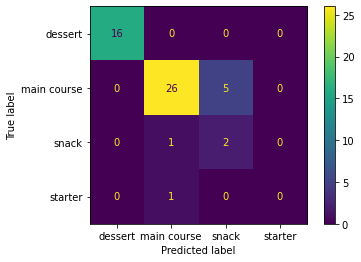

In [38]:
plot_confusion_matrix(clf2, X_test, y_test)  
plt.show() 

### Calculating the Producer's Accuracy

In [39]:
print('PRODUCERS ACCURACY')
print('Dessert:',cm2.iat[0,0]/(cm2.iat[0,0] + cm2.iat[0,1] + cm2.iat[0,2] + cm2.iat[0,3]))
print('Main Course:',cm2.iat[1,1]/(cm2.iat[1,0] + cm2.iat[1,1] + cm2.iat[1,2] + cm2.iat[1,3]))
print('Snack:',cm2.iat[2,2]/(cm2.iat[2,0] + cm2.iat[2,1] + cm2.iat[2,2] + cm2.iat[2,3]))
print('Starter:',cm2.iat[3,3]/(cm2.iat[3,0] + cm2.iat[3,1] + cm2.iat[3,2] + cm2.iat[3,3]))

PRODUCERS ACCURACY
Dessert: 1.0
Main Course: 0.8387096774193549
Snack: 0.6666666666666666
Starter: 0.0


### Calculating the User's Accuracy

In [40]:
print('USERS ACCURACY')
print('Dessert:',cm2.iat[0,0]/(cm2.iat[0,0] + cm2.iat[1,0] + cm2.iat[2,0] + cm2.iat[3,0]))
print('Main Course:',cm2.iat[1,1]/(cm2.iat[0,1] + cm2.iat[1,1] + cm2.iat[2,1] + cm2.iat[3,1]))
print('Snack:',cm2.iat[2,2]/(cm2.iat[0,2] + cm2.iat[1,2] + cm2.iat[2,2] + cm2.iat[3,2]))
print('Starter:',cm2.iat[3,3]/(cm2.iat[0,3] + cm2.iat[1,3] + cm2.iat[2,3] + cm2.iat[3,3]))

USERS ACCURACY
Dessert: 1.0
Main Course: 0.9285714285714286
Snack: 0.2857142857142857
Starter: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


## Gradient Boosting Classifier

### Training the model and calculating Overall Accuracy and Kappa Coefficient

In [41]:
clf3 = GradientBoostingClassifier(n_estimators=900, learning_rate=1.3, min_samples_split=4, validation_fraction=0.2)
clf3.fit(X_train,y_train)
y_pred3 = clf3.predict(X_test)

print("Accuracy_Score :",accuracy_score(y_test, y_pred3))
print("Kappa_Score : ",cohen_kappa_score(y_test, y_pred3))

cm3 = confusion_matrix(y_test,y_pred3)
cm3 = pd.DataFrame(cm3)



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy_Score : 0.7843137254901961
Kappa_Score :  0.5992857142857143


### Plotting the Confusion Matrix

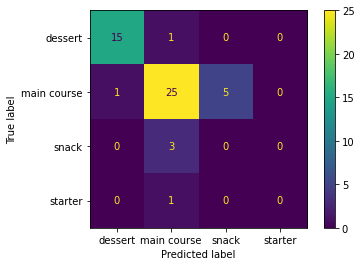

In [42]:
plot_confusion_matrix(clf3, X_test, y_test)  
plt.show() 

### Calculating the Producer's Accuracy

In [43]:
print('PRODUCERS ACCURACY')
print('Dessert:',cm3.iat[0,0]/(cm3.iat[0,0] + cm3.iat[0,1] + cm3.iat[0,2] + cm3.iat[0,3]))
print('Main Course:',cm3.iat[1,1]/(cm3.iat[1,0] + cm3.iat[1,1] + cm3.iat[1,2] + cm3.iat[1,3]))
print('Snack:',cm3.iat[2,2]/(cm3.iat[2,0] + cm3.iat[2,1] + cm3.iat[2,2] + cm3.iat[2,3]))
print('Starter:',cm3.iat[3,3]/(cm3.iat[3,0] + cm3.iat[3,1] + cm3.iat[3,2] + cm3.iat[3,3]))

PRODUCERS ACCURACY
Dessert: 0.9375
Main Course: 0.8064516129032258
Snack: 0.0
Starter: 0.0


### Calculating the User's Accuracy

In [44]:
print('USERS ACCURACY')
print('Dessert:',cm3.iat[0,0]/(cm3.iat[0,0] + cm3.iat[1,0] + cm3.iat[2,0] + cm3.iat[3,0]))
print('Main Course:',cm3.iat[1,1]/(cm3.iat[0,1] + cm3.iat[1,1] + cm3.iat[2,1] + cm3.iat[3,1]))
print('Snack:',cm3.iat[2,2]/(cm3.iat[0,2] + cm3.iat[1,2] + cm3.iat[2,2] + cm3.iat[3,2]))
print('Starter:',cm3.iat[3,3]/(cm3.iat[0,3] + cm3.iat[1,3] + cm3.iat[2,3] + cm3.iat[3,3]))

USERS ACCURACY
Dessert: 0.9375
Main Course: 0.8333333333333334
Snack: 0.0
Starter: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


##CLASSIFICATION OF FLAVOUR

### Concatenating the encoded categorical features and tokenized text matrix

In [45]:
y = df[5]
df2 = pd.concat([df,d1,d2,d3,d5,temp], axis=1)
df2.head()

,0,1,2,3,4,5,6,7,8,9,non vegetarian,vegetarian,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,NCT of Delhi,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,...,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335
0,Balu shahi,maida flour yogurt oil sugar,vegetarian,45,25,sweet,dessert,West Bengal,East,260,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boondi,gram flour ghee sugar,vegetarian,80,30,sweet,dessert,Rajasthan,West,270,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Gajar ka halwa,carrots milk sugar ghee cashews raisins,vegetarian,15,60,sweet,dessert,Punjab,North,450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ghevar,flour ghee kewra milk clarified butter sugar a...,vegetarian,15,30,sweet,dessert,Rajasthan,West,460,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gulab jamun,milk powder plain flour baking powder ghee mil...,vegetarian,15,40,sweet,dessert,West Bengal,East,300,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Plotting the value counts for different classes in Flavor

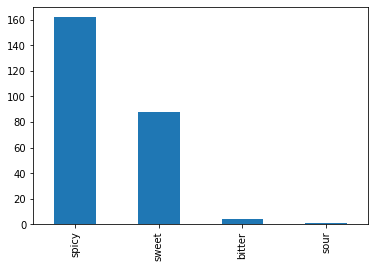

In [46]:
y.value_counts().plot.bar()

###Dropping of initial text and categorical features and Standardizing the data

In [47]:
X = df2.drop(columns=[0,1,2,5,6,7,8])
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367
0,0.134534,-0.299009,-1.069920,-0.358216,0.358216,-0.202031,-0.299572,-0.109109,-0.062746,-0.109109,-0.548653,-0.062746,-0.088911,-0.15523,-0.179969,-0.088911,-0.365148,-0.088911,-0.062746,-0.062746,-0.168005,-0.378811,-0.155230,-0.29173,-0.141421,-0.062746,-0.191273,-0.062746,3.102418,-0.109109,2.688086,-0.487713,-0.32969,-0.548653,-0.725911,1.414214,-1.011835,-0.424918,-0.088911,1.929306,...,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746
1,0.624341,-0.191544,-0.969382,-0.358216,0.358216,-0.202031,-0.299572,-0.109109,-0.062746,-0.109109,-0.548653,-0.062746,-0.088911,-0.15523,-0.179969,-0.088911,-0.365148,-0.088911,-0.062746,-0.062746,-0.168005,-0.378811,6.442049,-0.29173,-0.141421,-0.062746,-0.191273,-0.062746,-0.322329,-0.109109,-0.372012,-0.487713,-0.32969,-0.548653,1.377580,1.414214,-1.011835,-0.424918,-0.088911,1.929306,...,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746
2,-0.285301,0.453248,0.840299,-0.358216,0.358216,-0.202031,-0.299572,-0.109109,-0.062746,-0.109109,-0.548653,-0.062746,-0.088911,-0.15523,-0.179969,-0.088911,-0.365148,-0.088911,-0.062746,-0.062746,-0.168005,2.639839,-0.155230,-0.29173,-0.141421,-0.062746,-0.191273,-0.062746,-0.322329,-0.109109,-0.372012,2.050386,-0.32969,-0.548653,-0.725911,1.414214,-1.011835,-0.424918,-0.088911,1.929306,...,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746
3,-0.285301,-0.191544,0.940837,-0.358216,0.358216,-0.202031,-0.299572,-0.109109,-0.062746,-0.109109,-0.548653,-0.062746,-0.088911,-0.15523,-0.179969,-0.088911,-0.365148,-0.088911,-0.062746,-0.062746,-0.168005,-0.378811,6.442049,-0.29173,-0.141421,-0.062746,-0.191273,-0.062746,-0.322329,-0.109109,-0.372012,-0.487713,-0.32969,-0.548653,1.377580,1.414214,-1.011835,-0.424918,-0.088911,1.929306,...,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746
4,-0.285301,0.023387,-0.667768,-0.358216,0.358216,-0.202031,-0.299572,-0.109109,-0.062746,-0.109109,-0.548653,-0.062746,-0.088911,-0.15523,-0.179969,-0.088911,-0.365148,-0.088911,-0.062746,-0.062746,-0.168005,-0.378811,-0.155230,-0.29173,-0.141421,-0.062746,-0.191273,-0.062746,3.102418,-0.109109,2.688086,-0.487713,-0.32969,-0.548653,-0.725911,1.414214,-1.011835,-0.424918,-0.088911,1.929306,...,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-0.062746,-

##Creating Train and Test Datasets with Test size as 20% of the given Dataset

In [48]:
X_test = X.iloc[150:201,:].values
X_train1 = X.iloc[:150,:].values
X_train2 = X.iloc[201:,:].values
X_train3 = X.iloc[190:191,:].values

X_test = pd.DataFrame(X_test)
X_train1 = pd.DataFrame(X_train1)
X_train2 = pd.DataFrame(X_train2)
X_train3 = pd.DataFrame(X_train3)
X_train = pd.concat([X_train1,X_train2,X_train3], axis=0)

y_test = y.iloc[150:201].values
y_train1 = y.iloc[:150].values
y_train2 = y.iloc[201:].values
y_train3 = y.iloc[190:191].values

y_test = pd.DataFrame(y_test)
y_train1 = pd.DataFrame(y_train1)
y_train2 = pd.DataFrame(y_train2)
y_train3 = pd.DataFrame(y_train3)
y_train = pd.concat([y_train1,y_train2,y_train3], axis=0)

In [49]:
print('Number of Train Data :',X_train.shape[0])
print('Number of Test Data :',X_test.shape[0])
print('Percentage of Train Data :',(X_train.shape[0]/ X.shape[0])*100 , '%')
print('Percentage of Test Data :',(X_test.shape[0]/ X.shape[0])*100 , '%')

Number of Train Data : 205
Number of Test Data : 51
Percentage of Train Data : 80.3921568627451 %
Percentage of Test Data : 20.0 %


## Random Forest Classifier

### Training the model and calculating Overall Accuracy and Kappa Coefficient

In [50]:
clf1 = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=2, criterion='entropy', max_features=None)
clf1.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)

print("Accuracy_Score :", accuracy_score(y_test, y_pred1))

print("Kappa_Score :",cohen_kappa_score(y_test, y_pred1))

cm1 = confusion_matrix(y_test,y_pred1)
cm1 = pd.DataFrame(cm1)



Accuracy_Score : 0.9411764705882353
Kappa_Score : 0.7441471571906355


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Plotting the Confusion Matrix

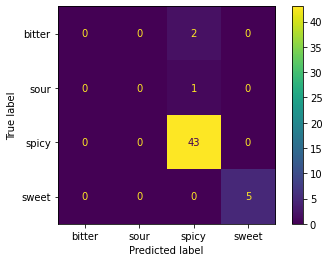

In [51]:
plot_confusion_matrix(clf1, X_test, y_test)  
plt.show() 

### Calculating the Producer's Accuracy

In [52]:
print('PRODUCERS ACCURACY')
print('Bitter:',cm1.iat[0,0]/(cm1.iat[0,0] + cm1.iat[0,1] + cm1.iat[0,2] + cm1.iat[0,3]))
print('Sour:',cm1.iat[1,1]/(cm1.iat[1,0] + cm1.iat[1,1] + cm1.iat[1,2] + cm1.iat[1,3]))
print('Spicy:',cm1.iat[2,2]/(cm1.iat[2,0] + cm1.iat[2,1] + cm1.iat[2,2] + cm1.iat[2,3]))
print('Sweet:',cm1.iat[3,3]/(cm1.iat[3,0] + cm1.iat[3,1] + cm1.iat[3,2] + cm1.iat[3,3]))

PRODUCERS ACCURACY
Bitter: 0.0
Sour: 0.0
Spicy: 1.0
Sweet: 1.0


### Calculating the User's Accuracy

In [53]:
print('USERS ACCURACY')
print('Bitter:',cm1.iat[0,0]/(cm1.iat[0,0] + cm1.iat[1,0] + cm1.iat[2,0] + cm1.iat[3,0]))
print('Sour:',cm1.iat[1,1]/(cm1.iat[0,1] + cm1.iat[1,1] + cm1.iat[2,1] + cm1.iat[3,1]))
print('Spicy:',cm1.iat[2,2]/(cm1.iat[0,2] + cm1.iat[1,2] + cm1.iat[2,2] + cm1.iat[3,2]))
print('Sweet:',cm1.iat[3,3]/(cm1.iat[0,3] + cm1.iat[1,3] + cm1.iat[2,3] + cm1.iat[3,3]))

USERS ACCURACY
Bitter: nan
Sour: nan
Spicy: 0.9347826086956522
Sweet: 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


## Support Vector Machine Classification

### Training the model and calculating Overall Accuracy and Kappa Coefficient


In [54]:
clf2 = SVC(kernel='sigmoid', gamma='auto', C=3.5, class_weight='balanced')
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)

print("Accuracy_Score :",accuracy_score(y_test, y_pred2))

print("Kappa_Score :",cohen_kappa_score(y_test, y_pred2))

cm2 = confusion_matrix(y_test,y_pred2)
cm2 = pd.DataFrame(cm2)



Accuracy_Score : 0.9215686274509803
Kappa_Score : 0.7446808510638299


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Plotting the Confusion Matrix

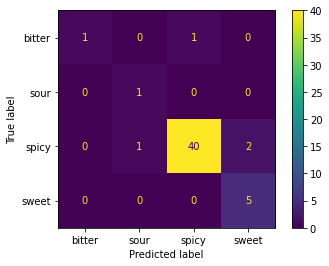

In [55]:
plot_confusion_matrix(clf2, X_test, y_test)  
plt.show() 

### Calculating the Producer's Accuracy

In [56]:
print('PRODUCERS ACCURACY')
print('Bitter:',cm2.iat[0,0]/(cm2.iat[0,0] + cm2.iat[0,1] + cm2.iat[0,2] + cm2.iat[0,3]))
print('Sour:',cm2.iat[1,1]/(cm2.iat[1,0] + cm2.iat[1,1] + cm2.iat[1,2] + cm2.iat[1,3]))
print('Spicy:',cm2.iat[2,2]/(cm2.iat[2,0] + cm2.iat[2,1] + cm2.iat[2,2] + cm2.iat[2,3]))
print('Sweet:',cm2.iat[3,3]/(cm2.iat[3,0] + cm2.iat[3,1] + cm2.iat[3,2] + cm2.iat[3,3]))

PRODUCERS ACCURACY
Bitter: 0.5
Sour: 1.0
Spicy: 0.9302325581395349
Sweet: 1.0


### Calculating the User's Accuracy

In [57]:
print('USERS ACCURACY')
print('Bitter:',cm3.iat[0,0]/(cm3.iat[0,0] + cm3.iat[1,0] + cm3.iat[2,0] + cm3.iat[3,0]))
print('Sour:',cm3.iat[1,1]/(cm3.iat[0,1] + cm3.iat[1,1] + cm3.iat[2,1] + cm3.iat[3,1]))
print('Spicy:',cm3.iat[2,2]/(cm3.iat[0,2] + cm3.iat[1,2] + cm3.iat[2,2] + cm3.iat[3,2]))
print('Sweet:',cm3.iat[3,3]/(cm3.iat[0,3] + cm3.iat[1,3] + cm3.iat[2,3] + cm3.iat[3,3]))

USERS ACCURACY
Bitter: 0.9375
Sour: 0.8333333333333334
Spicy: 0.0
Sweet: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


## Gradient Boosting Classifier

### Training the model and calculating Overall Accuracy and Kappa Coefficient

In [58]:
clf3 = GradientBoostingClassifier(n_estimators=900, learning_rate=1.3, min_samples_split=4, validation_fraction=0.2)
clf3.fit(X_train,y_train)
y_pred3 = clf3.predict(X_test)

print("Accuracy_Score :",accuracy_score(y_test, y_pred3))

cm3 = confusion_matrix(y_test,y_pred3)
cm3 = pd.DataFrame(cm3)

print("Kappa_Score : ",cohen_kappa_score(y_test, y_pred3))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy_Score : 0.9215686274509803
Kappa_Score :  0.7290836653386454


### Plotting the Confusion Matrix

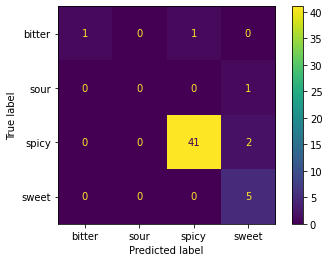

In [59]:
plot_confusion_matrix(clf3, X_test, y_test)  
plt.show() 

### Calculating the Producer's Accuracy

In [60]:
print('PRODUCERS ACCURACY')
print('Bitter:',cm3.iat[0,0]/(cm3.iat[0,0] + cm3.iat[0,1] + cm3.iat[0,2] + cm3.iat[0,3]))
print('Sour:',cm3.iat[1,1]/(cm3.iat[1,0] + cm3.iat[1,1] + cm3.iat[1,2] + cm3.iat[1,3]))
print('Spicy:',cm3.iat[2,2]/(cm3.iat[2,0] + cm3.iat[2,1] + cm3.iat[2,2] + cm3.iat[2,3]))
print('Sweet:',cm3.iat[3,3]/(cm3.iat[3,0] + cm3.iat[3,1] + cm3.iat[3,2] + cm3.iat[3,3]))

PRODUCERS ACCURACY
Bitter: 0.5
Sour: 0.0
Spicy: 0.9534883720930233
Sweet: 1.0


### Calculating the User's Accuracy

In [61]:
print('USERS ACCURACY')
print('Bitter:',cm3.iat[0,0]/(cm3.iat[0,0] + cm3.iat[1,0] + cm3.iat[2,0] + cm3.iat[3,0]))
print('Sour:',cm3.iat[1,1]/(cm3.iat[0,1] + cm3.iat[1,1] + cm3.iat[2,1] + cm3.iat[3,1]))
print('Spicy:',cm3.iat[2,2]/(cm3.iat[0,2] + cm3.iat[1,2] + cm3.iat[2,2] + cm3.iat[3,2]))
print('Sweet:',cm3.iat[3,3]/(cm3.iat[0,3] + cm3.iat[1,3] + cm3.iat[2,3] + cm3.iat[3,3]))

USERS ACCURACY
Bitter: 1.0
Sour: nan
Spicy: 0.9761904761904762
Sweet: 0.625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
